In [ ]:
import torch
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

device = "cuda:1" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")

'''
If error occurs, run again to resume download
'''
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", 
    torch_dtype=torch.float16,
    resume_download=True
)
model.to(device)

In [105]:
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
import base64

def plotdesc(fig, text, iwidth=None):
    bio = BytesIO()
    # save fig as png to bytes IO instead to disk
    fig.savefig(bio, format='png')
    plt.close(fig)
    iwidth = ' width={0} '.format(iwidth) if iwidth is not None else ''
    
#    img_tag = "<img src='data:image/png;base64," + base64.b64encode(bio.getvalue()) + "'{0}/>".format(iwidth)

    img_tag = "<img src='data:image/png;base64," + str(base64.b64encode(bio.getvalue()).decode())
    img_tag += "'{0}/>"
    img_tag = img_tag.format(iwidth)
    
    datatable = '<table><tr><td>{0}</td><td>{1}</td></tr></table>'.format(img_tag, text)
    display(HTML(datatable))

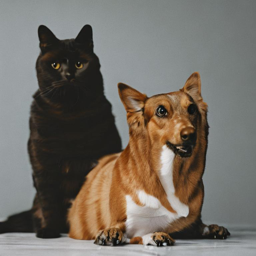

In [23]:
# load image
# prompt_3: a dog is sitting in front a cat
raw_image = Image.open('test_images/prompt_3/4bdc8c24-3de9-43c2-9617-30c06cec5fe1.jpeg')
# raw_image = Image.open('test_images/prompt_2_v1.jpeg')
display(raw_image.resize((256, 256)))

In [24]:
# load image
# image = Image.open('test_images/prompt_2_v1.jpeg')
image = Image.open('test_images/prompt_3/4bdc8c24-3de9-43c2-9617-30c06cec5fe1.jpeg')

inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(f"BLIP output: {generated_text}")

a dog and cat sitting together on a white background


In [ ]:

inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print("Original prompt: a dog is sitting in front a cat")
print(f"Caption from BLIP-2: {generated_text}\n")

prompt ="Question: is the cat in front of the dog? Answer:"

# input prompt to BLIP-2
inputs = processor(images=image,  text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    
print(f"{prompt} {generated_text}\n")

In [ ]:
'''
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
import base64

def plotdesc(fig, text, iwidth=None):
    bio = BytesIO()
    # save fig as png to bytes IO instead to disk
    fig.savefig(bio, format='png')
    plt.close(fig)
    iwidth = ' width={0} '.format(iwidth) if iwidth is not None else ''
    
#    img_tag = "<img src='data:image/png;base64," + base64.b64encode(bio.getvalue()) + "'{0}/>".format(iwidth)

    img_tag = "<img src='data:image/png;base64," + str(base64.b64encode(bio.getvalue()).decode())
    img_tag += "'{0}/>"
    img_tag = img_tag.format(iwidth)
    
    datatable = '<table><tr><td>{0}</td><td>{1}</td></tr></table>'.format(img_tag, text)
    display(HTML(datatable))
'''

,"BLIP-2: a dog and cat sitting together on a white backgroundQ: is the cat in front of the dog?A: no, the cat is in front of the dogQ: is the cat behind the dog?A: no, the cat is in front of the dogQ: is the dog in front of the cat?A: no, the dog is in front of the catQ: is the dog behind the cat?A: no, the dog is in front of the catQ: what animal is behind the dog?A: the catQ: what animal is in front of the dog?A: the catQ: what animal is behind the cat?A: a dogQ: what animal is in front of the cat?A: the dogQ: is the cat on the left of the dog?A: yesQ: is the cat on the right of the dog?A: yesQ: is the dog on the left of the cat?A: yesQ: is the dog on the right of the cat?A: yes"

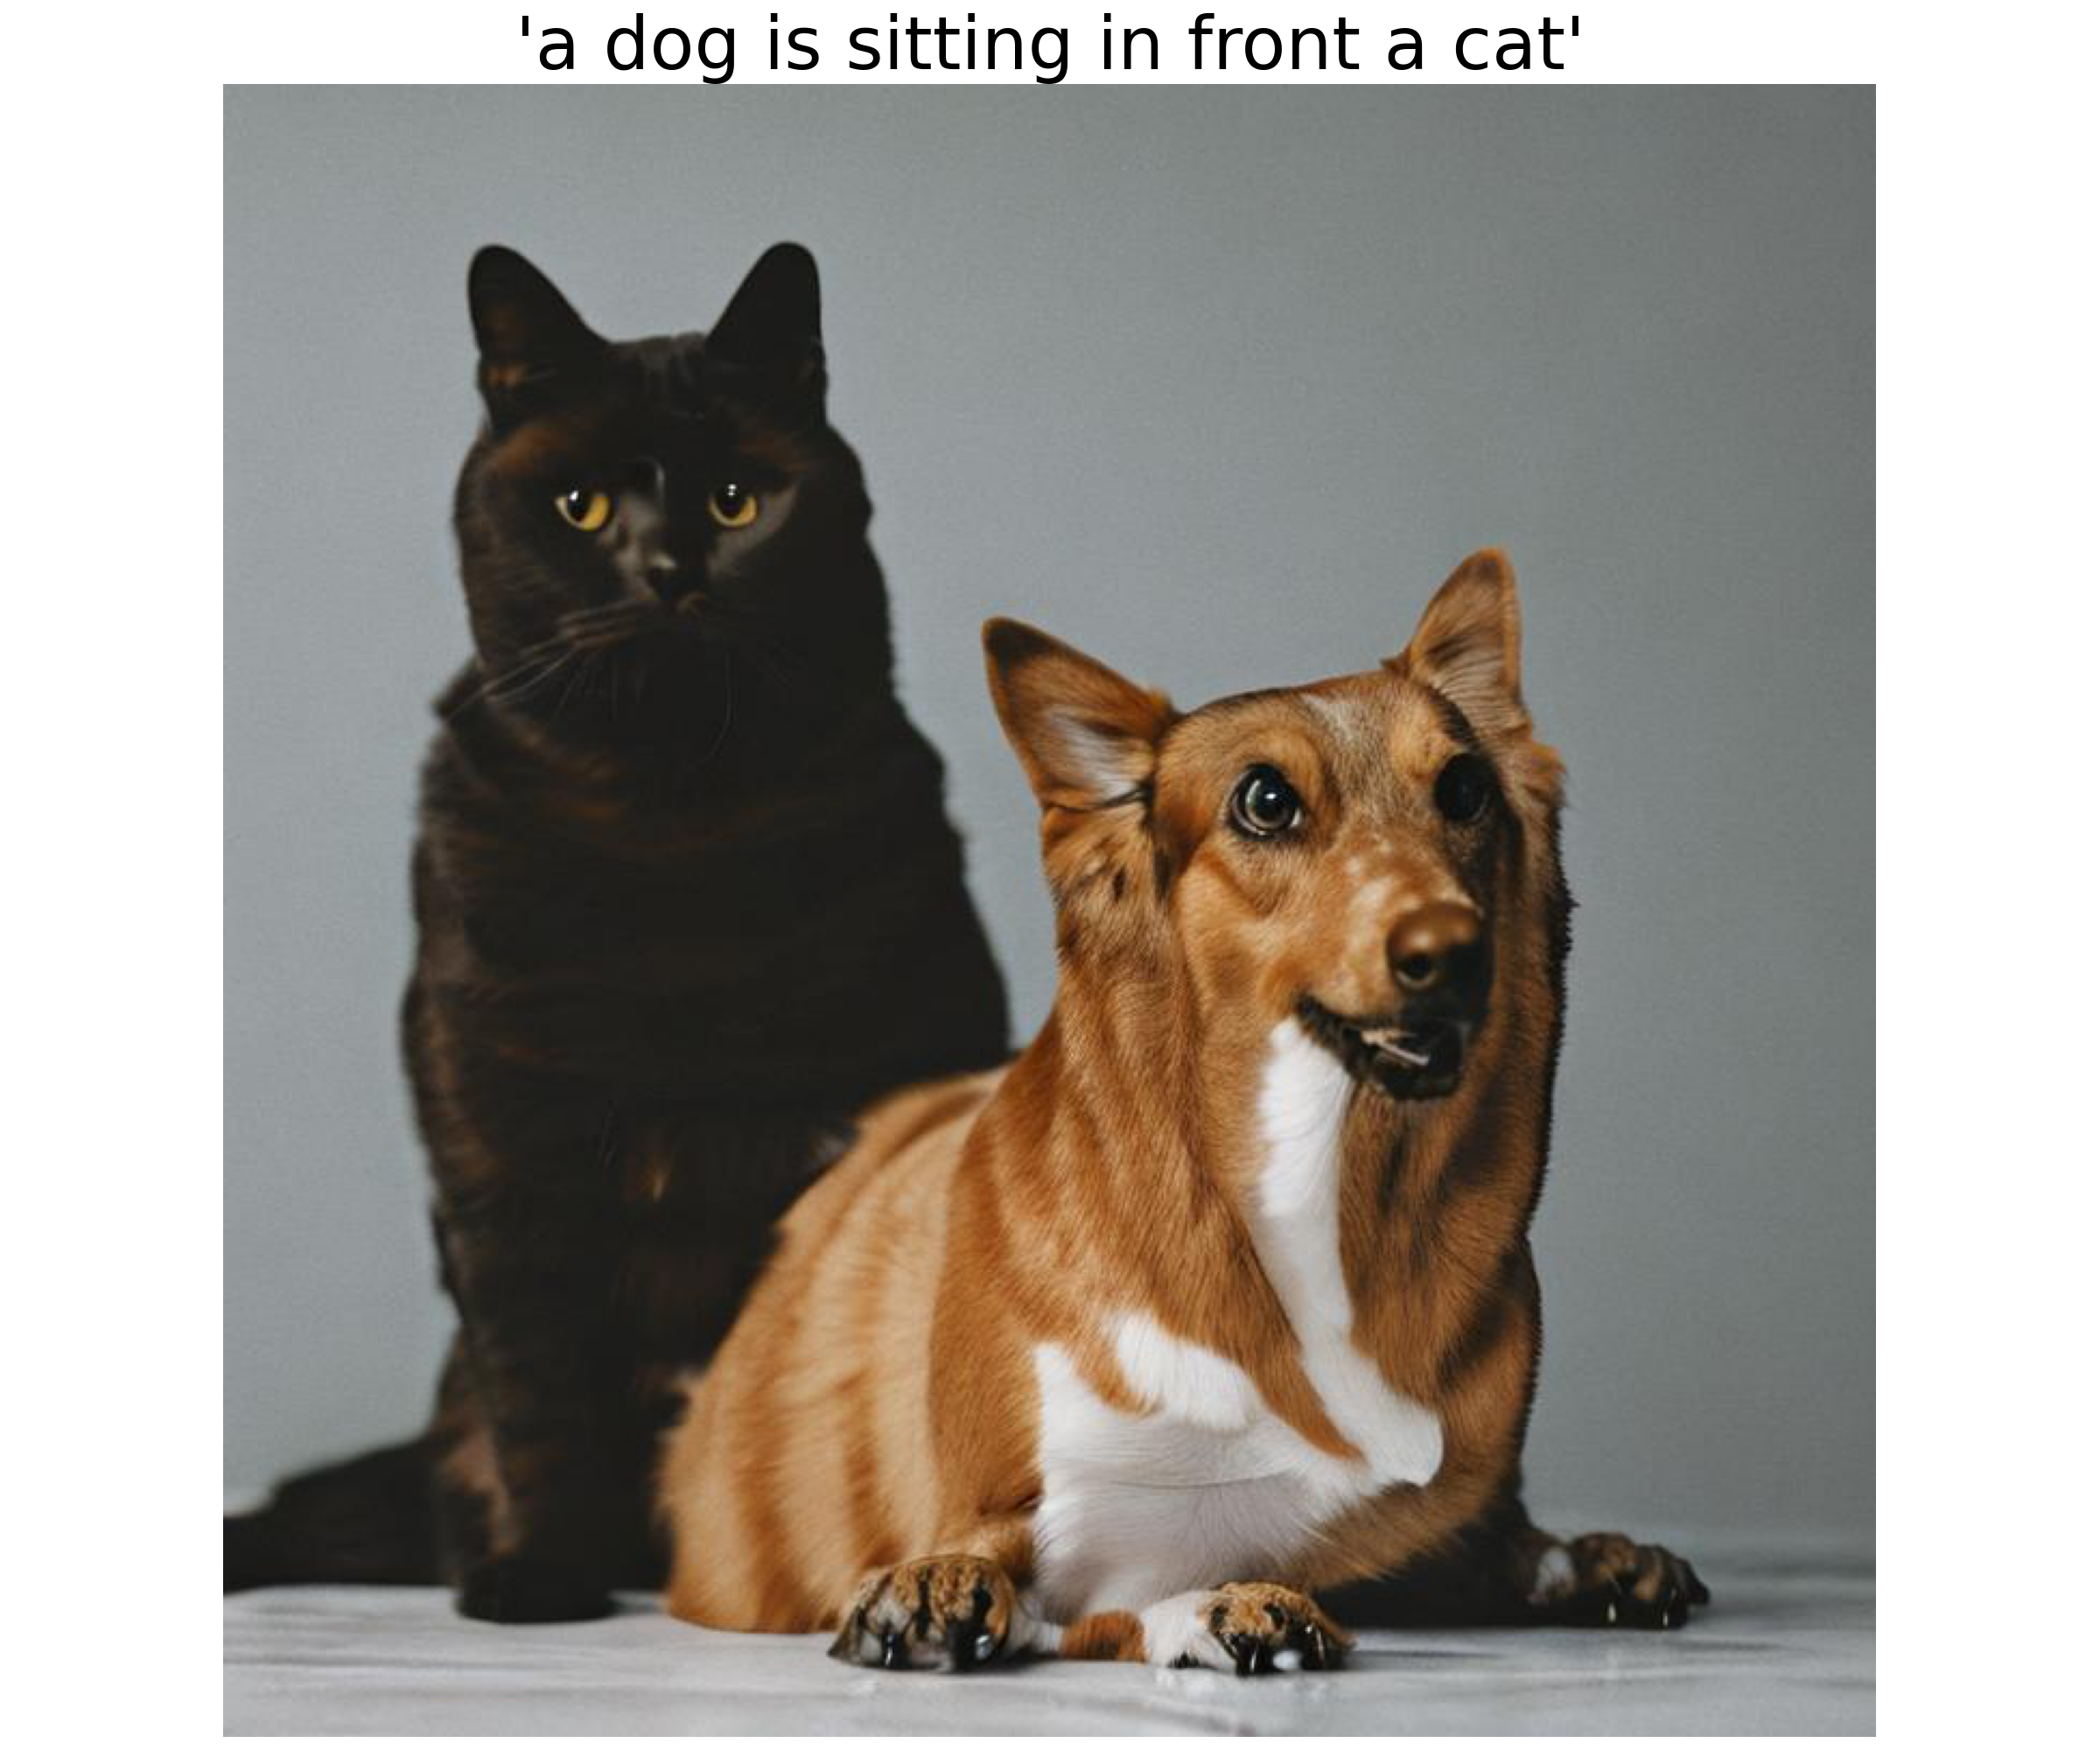

In [125]:
'''
fig, ax = plt.subplots(1,1, figsize=(24, 20))
ax.imshow(image)
# ax.title(f"{qa_list[0][0]}")
ax.set_title(f"'{qa_list[0][0]}'", fontsize=60)
ax.axis('off')
fig.tight_layout()

text = "<div align='left'>"

# text += "<b>Prompt:</b> " + qa_list[0][0] + "<br>"
text += "<b>BLIP-2:</b> " + qa_list[0][1] + "<br><br>"

for qa in qa_list[1:]:
    text += "<b>Q:</b> " + qa[0] + "<br>"
    text += "<b>A:</b> " + qa[1] + "<br><br>"

text += "</div>"

plotdesc(fig, text, iwidth='400px')
'''